#### Q1 Implement the following operations (forward and backward pass)

a. Matrix multiplication layer W X

b. Bias addition layer

c. Mean squared loss layer

d. Soft max layer

e. Sigmoid layer

f. Cross entropy loss layer





In [ ]:
#Importing Libraries
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
# Matrix Multiplication Forward Pass
def F1(X, W):
  return X@W

# Matrix Multiplication Backward Pass with respect to X
def B1_X(N,X,W):
  row1 = np.shape(X)[0]
  col1 = np.shape(X)[1]
  row2 = np.shape(N)[0]
  col2 = np.shape(N)[1]
  shape = (row1, col1, row2, col2)
  N_X = np.zeros(shape)
  for i in range(row1):
    for j in range(col1):
      for k in range(col2):
        N_X[i][j][i][k] = W[j][k]
  return N_X

# Matrix Multiplication Backward Pass with respect to W
def B1_W(N,X,W):
  return X

# Bias Addition Layer
def F2(N, B):
  return N + B

# Backward Pass of Bias Addition Layer with respect to N
def B2_N(P):
  n = np.shape(P)[0]
  return np.eye(n)

# Backward Pass of Bias Addition Layer with respect to P
def B2_B(P):
  shape = (np.shape(P)[0],1)
  return np.ones(shape)

# Mean Squared Loss Layer
def F3(P, Y):
    return np.sum((P - Y)**2)

# Backward Pass of Mean Squared Loss Layer
def B3(P, Y):
  return 2*(P-Y)

# Softmax Layer
def F4(P):
  exp_matrix = np.exp(P)
  return exp_matrix / np.sum(exp_matrix, axis=1, keepdims=True)

# Backward Pass of Softmax Layer
def B4(P, Q):
  row1 = np.shape(P)[0]
  col1 = np.shape(P)[1]
  row2 = np.shape(Q)[0]
  col2 = np.shape(Q)[1]
  shape = (row1, col1, row2, col2)
  Q_P = np.zeros(shape)
  for i in range(row1):
    for j in range(col1):
      for k in range(col2):
        if k==j:
          Q_P[i][j][i][k] = Q[i][j]*(1-Q[i][k])
        else:
          Q_P[i][j][i][k] = -1*Q[i][j]*(Q[i][k])
  return Q_P

# Sigmoid Layer
def F5(P):
  return 1 / (1 + np.exp(-P))

# Backward Pass of Sigmoid layer
def B5(P,Q):
  row1 = np.shape(P)[0]
  shape = (row1, row1)
  Q_P = np.zeros(shape)
  for i in range(row1):
    Q_P[i][i] = Q[i][1]*(1-Q[i][1])
  return Q_P

# Cross Entropy Loss Layer
def F6(Q, Y):
  logQ=np.log(Q)
  return -1*np.sum(Y*logQ)

# Backward Pass of Cross Entropy Loss Layer
def B6(Q, Y, L):
  L_Q = np.zeros(Q.shape)
  for i in range(0,Q.shape[0]):
    for j in range(0,Q.shape[1]):
      L_Q[i][j]=-1*(Y[i][j]/Q[i][j])
  return L_Q

# dl/dp
def L_P(Y,Q):
  ans=np.zeros(Q.shape)
  for i in range(Q.shape[0]):
    for j in range(Q.shape[1]):
      ans[i][j] = Q[i][j]-Y[i][j]
  return ans

#### Q2. Using the sklearn.load boston() function, obtain boston house pricing dataset. Train a regression model using the operations implemented above. You need to write a stochastic gradient descent function to train.

In [ ]:
# Fetching housing data
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

# Taking top 1000 samples and normalizing taking max value
X_2 = housing.data[0:1000] / np.max(housing.data[0:1000], axis=0, keepdims=True)
Y_2 = (housing.target[0:1000] / np.max(housing.target[0:1000])).reshape(-1, 1)

In [ ]:
# Train-Test Split
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X_2, Y_2, test_size=0.25, random_state=42)

In [ ]:
# Initializing random weights and bias
shape = (np.shape(X_2)[1],1)
W_2 = np.random.randn(*shape)
B_2 = np.random.rand()
print(W_2)
print(B_2)

[[-0.95443711]
 [-0.10231087]
 [ 1.97490343]
 [-0.81633541]
 [-0.35445493]
 [ 0.20041858]
 [-1.21090963]
 [ 0.792046  ]]
0.5948636549550996


In [ ]:
# Regression model which returns final weights and final bias
def regression(learning_rate, max_iterations, X, Y, W, B):
  iteration = []
  L = []
  #Stochastic Gradient Descent
  for k in range(max_iterations):
    l=0
    for i in range(X.shape[0]):
      input = X[i:i+1,:]
      output = Y[i:i+1,:]
      N = F1(input,W)
      P = F2(N,B)
      l += F3(P,output)
      dl_dp = B3(P,output)
      dp_dn = B2_N(P)
      dn_dw = B1_W(N,input,W)
      dp_db = B2_B(P)
      dl_dw = ((dl_dp)@(dp_dn)@(dn_dw)).T
      dl_db = ((dl_dp)@(dp_db))[0][0]
      W = W - learning_rate*dl_dw
      B = B - learning_rate*dl_db
    L.append(l)
    iteration.append(k)

  return (L, iteration,W,B)

In [ ]:
learning_rate = 0.001
max_iterations = 1000

# Training model
(L_2,iteration_2,W_final_2,B_final_2) = regression(learning_rate, max_iterations, X_train_2, Y_train_2, W_2, B_2)

In [ ]:
# Final weights and Final bias
print(W_final_2)
print(B_final_2)

[[ 0.92815795]
 [ 0.06826076]
 [ 0.06890038]
 [-0.26313017]
 [ 0.21036407]
 [-0.40660054]
 [-1.12312936]
 [ 0.79443465]]
0.5800355009725986


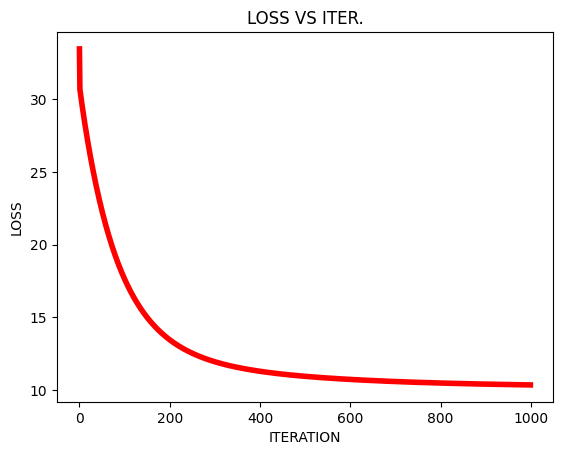

In [ ]:
# Plot of Loss v.s Iteration
plt.plot(iteration_2,L_2,lw=4,color='red')
plt.xlabel("ITERATION")
plt.ylabel("LOSS")
plt.title('LOSS VS ITER.')

# Show plot
plt.show()

In [ ]:
# Testing model
Y_pred = X_test_2@W_final_2 + B_final_2

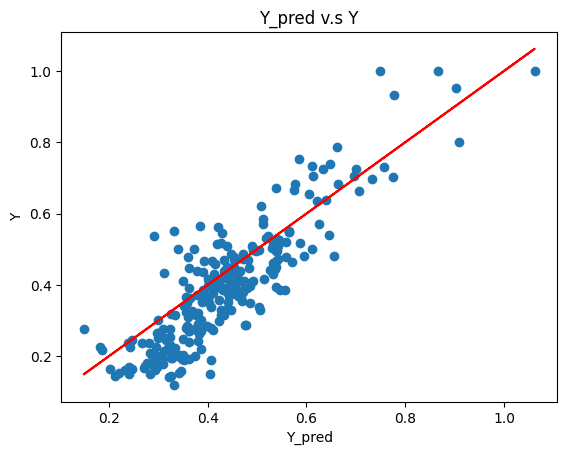

In [ ]:
# Plot of Y_pred vs. Y_real
plt.xlabel("Y_pred")
plt.ylabel("Y")
plt.title('Y_pred v.s Y')
plt.scatter(Y_pred,Y_test_2)
plt.plot(Y_pred,Y_pred,color='red')

#### 3. Load the iris dataset in sklearn. This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray. Using the operations implemented above create a multi-class classifier (Cross entropy loss + soft max)

In [ ]:
# Loading Iris data
dataset=load_iris()
X_3=dataset.data
Y_3=dataset.target
X_3, Y_3 = shuffle(X_3, Y_3, random_state=42)

In [ ]:
# Train-Test Split
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size=0.25, random_state=42)

In [ ]:
#one-hot encoding
Y_one_hot = np.zeros((Y_train_3.shape[0],3))
for i in range(Y_train_3.shape[0]):
  Y_one_hot[i][Y_train_3[i]] = 1
Y_train_3 = Y_one_hot

In [ ]:
# Forward Pass for multilabel classification
# Output: Softmax matrix and Loss
def forward_pass(X,W,B,Y):
  N=F1(X,W)
  P=F2(N,B)
  Q=F4(P)
  L=F6(Q,Y)
  return (L,P,Q)

# Backward Pass for multilabel classification
# Output: Gradient of Loss w.r.t weight and bias
def backward_pass(X,W,B,P,Q,Y):
  dl_dp = L_P(Y,Q)
  dl_dw = (X.T)@(dl_dp)
  dl_db=np.sum(dl_dp)
  return (dl_dw,dl_db)

# Predict output
def predict(X,W,B):
  N=F1(X,W)
  P=F2(N,B)
  Q=F4(P)
  return np.argmax(Q,axis=1)

# Shows Performance of the model
def accuracy_score(predictions, Y_test):
  count = 0;
  for i in range(Y_test.shape[0]):
    if predictions[i]==Y_test[i]:
      count+=1
  return (count/Y_test.shape[0])*100


In [ ]:
# Initializing weights and bias randomly
shape = (np.shape(X_3)[1],3)
W_3 = np.random.randn(*shape)
B_3 = np.random.rand()
print(W_3)
print(B_3)

[[ 0.01111987  1.59848871  0.39634099]
 [-2.80870415 -0.14167945 -0.99990577]
 [-1.10178991  0.63112198  0.27209148]
 [ 0.78583832  0.30982441 -0.323197  ]]
0.46505319174566595


In [ ]:
# Function to train model
# Output: Final weight and Final bias
def multilabel_classification(learning_rate, max_iteration, W, B,X_train,Y_train):
  L = []
  iteration = []
  for i in range(max_iteration):
    l,P,Q = forward_pass(X_train,W,B,Y_train)
    (dl_dw,dl_db) = backward_pass(X_train,W,B,P,Q,Y_train)
    W = W - learning_rate*dl_dw
    B = B - learning_rate*dl_db
    L.append(l)
    iteration.append(i)
  return (L,iteration,W,B)

In [ ]:
learning_rate = 0.0001
max_iteration = 1000

# Training model
(L_3,iteration_3,W_final_3,B_final_3) = multilabel_classification(learning_rate, max_iteration, W_3, B_3,X_train_3,Y_train_3)



In [ ]:
# Predicting output
predictions = predict(X_test_3,W_final_3,B_final_3)

In [ ]:
# Accuracy score
print(accuracy_score(predictions,Y_test_3))

97.36842105263158


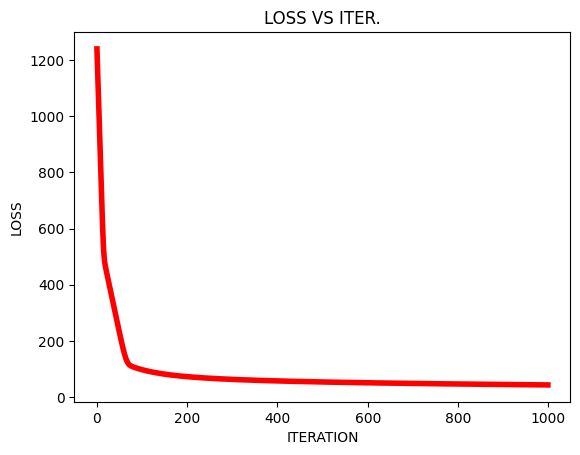

In [ ]:
# Plot of Loss vs. Iteration
plt.plot(iteration_3,L_3,lw=4,color='red')
plt.xlabel("ITERATION")
plt.ylabel("LOSS")
plt.title('LOSS VS ITER.')

# Show plot
plt.show()